In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime, date
import re
from IPython.display import display, HTML
from tabulate import tabulate

In [ ]:
file_path='E:/Metro2/raw_data//'
# file_path='E:/Metro2/artifacts//'
df=pd.read_csv(file_path+'Data.csv')

In [ ]:
for column in df.select_dtypes(include='object').columns:
    if re.match(r'^12c\([a-e]\)$', column):
        df[column] = df[column].apply(lambda x: 'Will use for both trips' if ',' in x else x)
    df[column] = df[column].str.replace(r'\(.*\)', '', regex=True)


In [ ]:
# df['1'].unique()

In [ ]:
name_dict = {'Tulasi ':'Tulasi', 'Vasundhara N ': 'Vasundhara N', 'Tulasi NS ':'Tulasi',
        'Varad ':'varad', 'Varad Verma ':'varad', 'Varad Verm ':'varad',
       'Varad. Verma ':'varad', 'Varad Verma':'varad', 'Varad verma':'varad','Sneha ':'Sneha',
       'HAMIM SADIQUE ':'HAMIM SADIQUE','Gayathri Krija ':'Gayathri Krija','tulasi ':'Tulasi',
       'Ruthu m':'Ruthu','Ruthu m ':'Ruthu','sneha':'Sneha','HariPrasad h':'HariPrasad','HARIPRASAD ':'HariPrasad',
       'HariPrasad ':'HariPrasad','Hari Prasad ':'HariPrasad'}

# map column 1 names to the above name_dict
df['1'] = df['1'].map(name_dict).fillna(df['1'])

# print(df['1'].unique(),df.shape[0])
# print("Number of samples: ",df.shape[0],df['1'].unique())


In [ ]:
# remove all the rows where column 1 as varad
df = df[df['1'] != 'varad']
# df = df[df['1'] != 'Tulasi']

In [ ]:
# # # # for each unique value of column named 1 print the value count of entries in column named comment
# # Iterate over each unique value of column 1
# for name in df['1'].unique():
#     print(name)
#     # Get the comment value counts for the current name
#     comment_counts = df[df['1'] == name]['comment'].value_counts()
#     # Print the comment value counts in a nice format
#     for comment, count in comment_counts.items():
#         print(f"{comment}: {count}")
#     print('\n')


# # # # let capture the percentage of percent entries in column comment for each unique value of column named 1
# # for name in df['1'].unique():
# #     # print(name)
# #     print(name, round(df[df['1']==name]['comment'].str.contains('perfect').sum()/df[df['1']==name].shape[0] *100,2),df[df['1']==name].shape[0])
# #     # print('\n')


In [ ]:
# Display the output with increased size
display(HTML(f"<h2>No of samples is {df.shape[0]}</h0>"))
display(HTML(f"<h0>Total samples obtained by survey is 620 but after eliminating samples with sanity issues it is 583</h0>"))

In [ ]:
display(HTML(f"<h2>Samples on each day of week</h2>"))

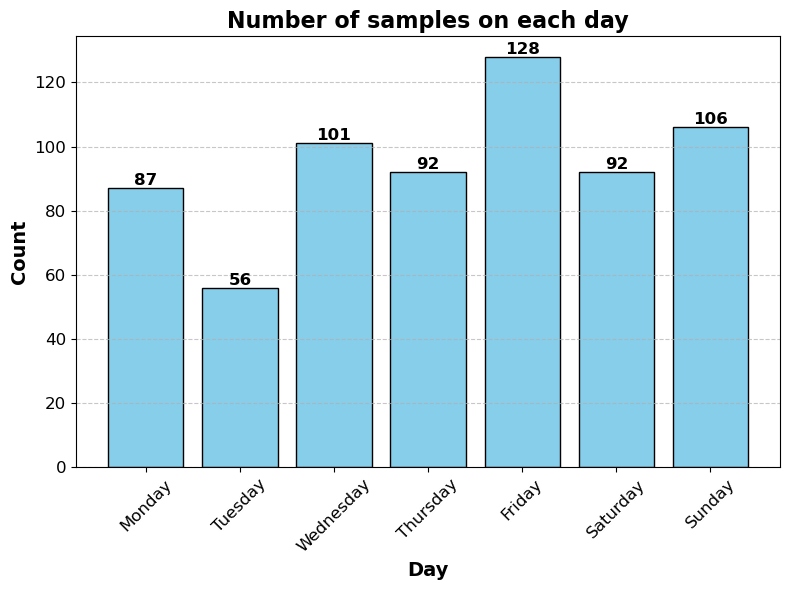

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y %H:%M')

# Extract the day of the week (0: Monday, 1: Tuesday, ..., 6: Sunday)
df['Day_of_Week'] = df['Timestamp'].dt.dayofweek

# Define the labels for days of the week
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Count the number of occurrences for each day of the week
day_counts = df['Day_of_Week'].value_counts().sort_index()

# Ensure day_counts has the same length as day_labels
day_counts = day_counts.reindex(range(7), fill_value=0)

plt.figure(figsize=(8, 6))

# Plot a bar chart with enhancements
bars = plt.bar(day_labels, day_counts, color='skyblue', edgecolor='black')

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Add a grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize the axes and title
plt.xlabel('Day', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Number of samples on each day', fontsize=16, fontweight='bold')

# Optionally, you can rotate the x-axis labels if they are too long
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add some padding to the plot
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:

df['Time stamp time'] = pd.to_datetime(df['Timestamp']).apply(lambda x: x.time())
df['Start time of survey']=pd.to_datetime(df['Start time of survey'])
df['Start time of survey'] = df['Start time of survey'].apply(lambda x: datetime.strftime(x, '%H:%M:%S'))


C:\Users\PC\AppData\Local\Temp\ipykernel_196736\800887808.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Start time of survey']=pd.to_datetime(df['Start time of survey'])


In [ ]:
time_diffs = []

# Iterate over the rows of the DataFrame
for index, row in df.iterrows():
    # Convert the time string to datetime.time object
    time_obj = datetime.strptime(row.iloc[1], '%H:%M:%S').time()  

    # time_obj = datetime.strptime(row.iloc[50], '%H:%M:%S').time()
  
    
    # Calculate the time difference between two columns in minutes
    time_diff_minutes = (datetime.combine(date.today(), row.iloc[50]) - datetime.combine(date.today(), time_obj)).total_seconds() / 60

    # Append the time difference to the list
    time_diffs.append(time_diff_minutes)

# Add the list as a new column in the DataFrame
df['time_diff'] = time_diffs

In [ ]:
time_diffs = []

# Iterate over the rows of the DataFrame
for index, row in df.iterrows():
    try:
        # Convert the time string to datetime.time object
        time_obj = datetime.strptime(row.iloc[1], '%H:%M:%S').time()  
        # Calculate the time difference between two columns in minutes
        time_diff_minutes = (datetime.combine(date.today(), row.iloc[50]) - datetime.combine(date.today(), time_obj)).total_seconds() / 60
        # Append the time difference to the list
        time_diffs.append(time_diff_minutes)
    except Exception as e:
        print(f"Error processing row {index}: {e}")
        # Append NaN if an error occurs
        time_diffs.append(float('nan'))

# Add the list as a new column in the DataFrame
df['time_diff'] = time_diffs


In [ ]:
display(HTML(f"<h2>Average time taken by each intern</h2>"))
display(HTML(f"<h0>These are computed by using time stamps from google form and time reported by intern as start time of survey but interns may enter inaccurate times and so these may not be true times spent by them. Interns are not aware of timestamp given by google form and hence this helps in sanity check.</h0>"))

In [ ]:
results = []
for name in df['1'].unique():
    # Calculate the average value of time_diff for the current name
    avg_time_diff = df[df['1'] == name]['time_diff'].mean()
    # Append the result to the list
    results.append([name, f"{avg_time_diff:.2f}"])

# Define the headers
headers = ["Name", "Average Time (min)"]

# Print the result as a table
print(tabulate(results, headers=headers, tablefmt='pretty'))

+----------------+--------------------+
|      Name      | Average Time (min) |
+----------------+--------------------+
|     Tulasi     |        6.15        |
|  Vasundhara N  |       12.99        |
|   Keerthi M    |       15.71        |
|     Sneha      |        9.25        |
|     Ruthu      |       26.16        |
| HAMIM SADIQUE  |       27.78        |
| Gayathri Krija |        8.03        |
|     Anshu      |        8.22        |
|   HariPrasad   |        6.78        |
|  Govardhan G   |        7.95        |
|  HariPrasad h  |        8.50        |
+----------------+--------------------+


In [ ]:
# df['Person_Index'] = df.groupby('1').cumcount()

# # Plotting
# plt.figure(figsize=(10, 6))
# sns.lineplot(data=df, x='Person_Index', y='time_diff', hue='1', marker='o')
# plt.xlabel('No of samples')
# plt.ylabel('Time Taken (minutes)')
# plt.title('Time Taken to Complete Task by Person')
# plt.grid(True)
# plt.legend(title='Intern')
# plt.show()

In [ ]:
display(HTML(f"<h2>Sample collection at different times of day</h2>"))

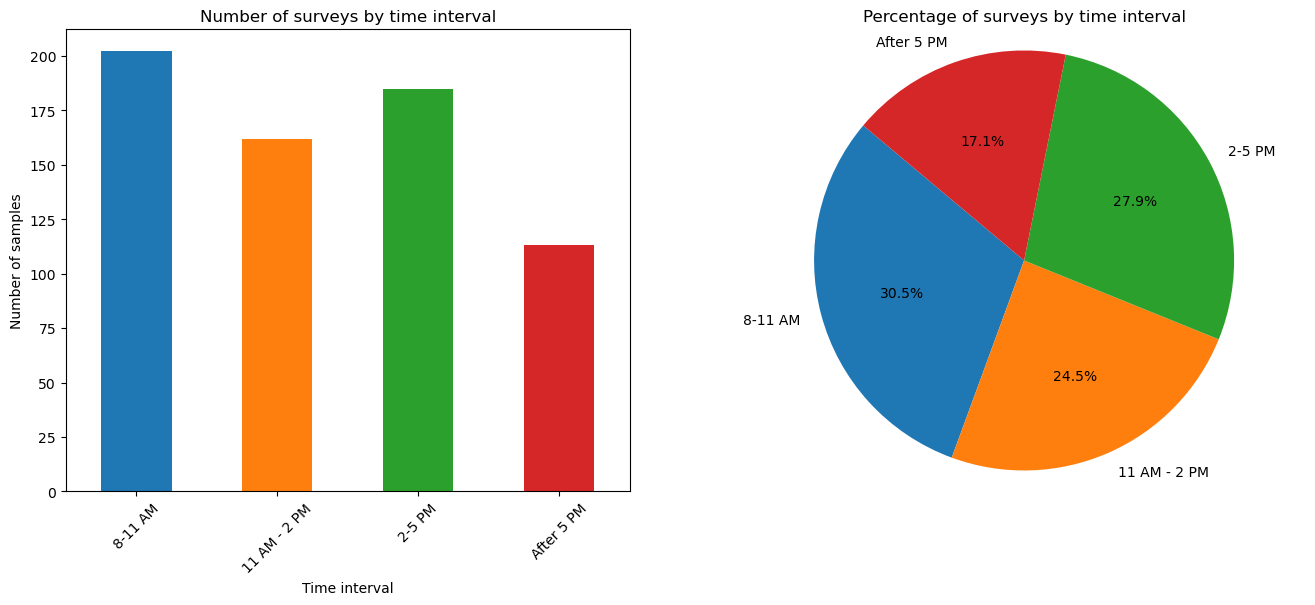

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y %H:%M')

# Define time intervals and labels
time_intervals = [(8, 11), (11, 14), (14, 17), (17, 20)]
labels = ['8-11 AM', '11 AM - 2 PM', '2-5 PM', 'After 5 PM']

# Categorize timestamps into time intervals
def categorize_time(timestamp):
    hour = timestamp.hour
    for interval, label in zip(time_intervals, labels):
        if interval[0] <= hour < interval[1]:
            return label
    return 'After 5 PM'

df['Time Interval'] = df['Timestamp'].apply(categorize_time)

# Calculate value counts for each time interval
value_counts = df['Time Interval'].value_counts().reindex(labels)

# Define a color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plot the bar chart and pie chart
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
value_counts.plot(kind='bar', color=colors, ax=axes[0])
axes[0].set_title('Number of surveys by time interval')
axes[0].set_xlabel('Time interval')
axes[0].set_ylabel('Number of samples')
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
axes[1].pie(value_counts, labels=value_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Percentage of surveys by time interval')
axes[1].axis('equal')

plt.show()

In [ ]:
display(HTML(f"<h2>Gender proportion in the sample</h2>"))

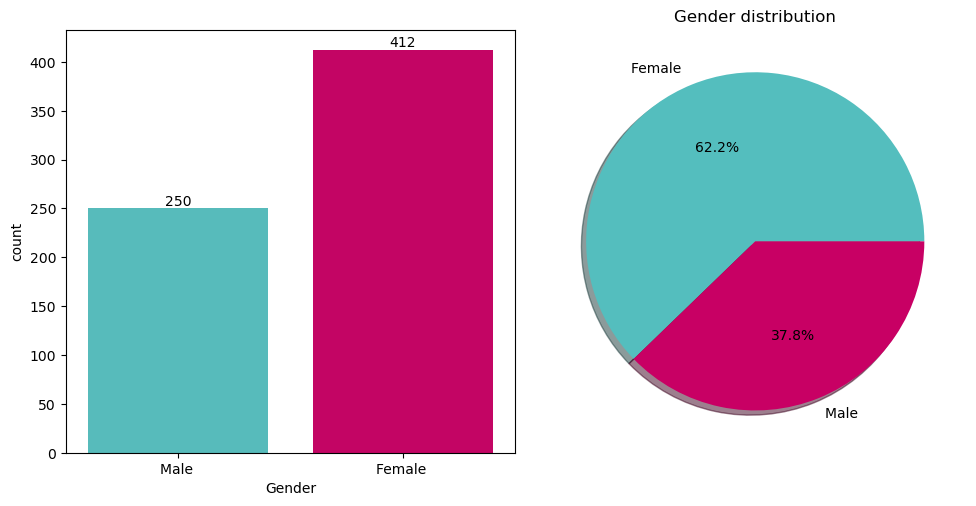

In [ ]:
colors = ["#54bebe", "#c80064"]  # Color for Female and Male

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(10, 5))

# Bar chart
sns.countplot(x='17', data=df, palette=colors, ax=ax[0], saturation=0.95)
ax[0].xaxis.set_label_text('Gender')
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=10)

# Pie chart
gender_counts = df['17'].value_counts()
ax[1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', shadow=True, colors=colors)
ax[1].set_title('Gender distribution')

plt.tight_layout()
plt.show()

In [ ]:
display(HTML(f"<h2>Different age groups covered in the sample</h2>"))

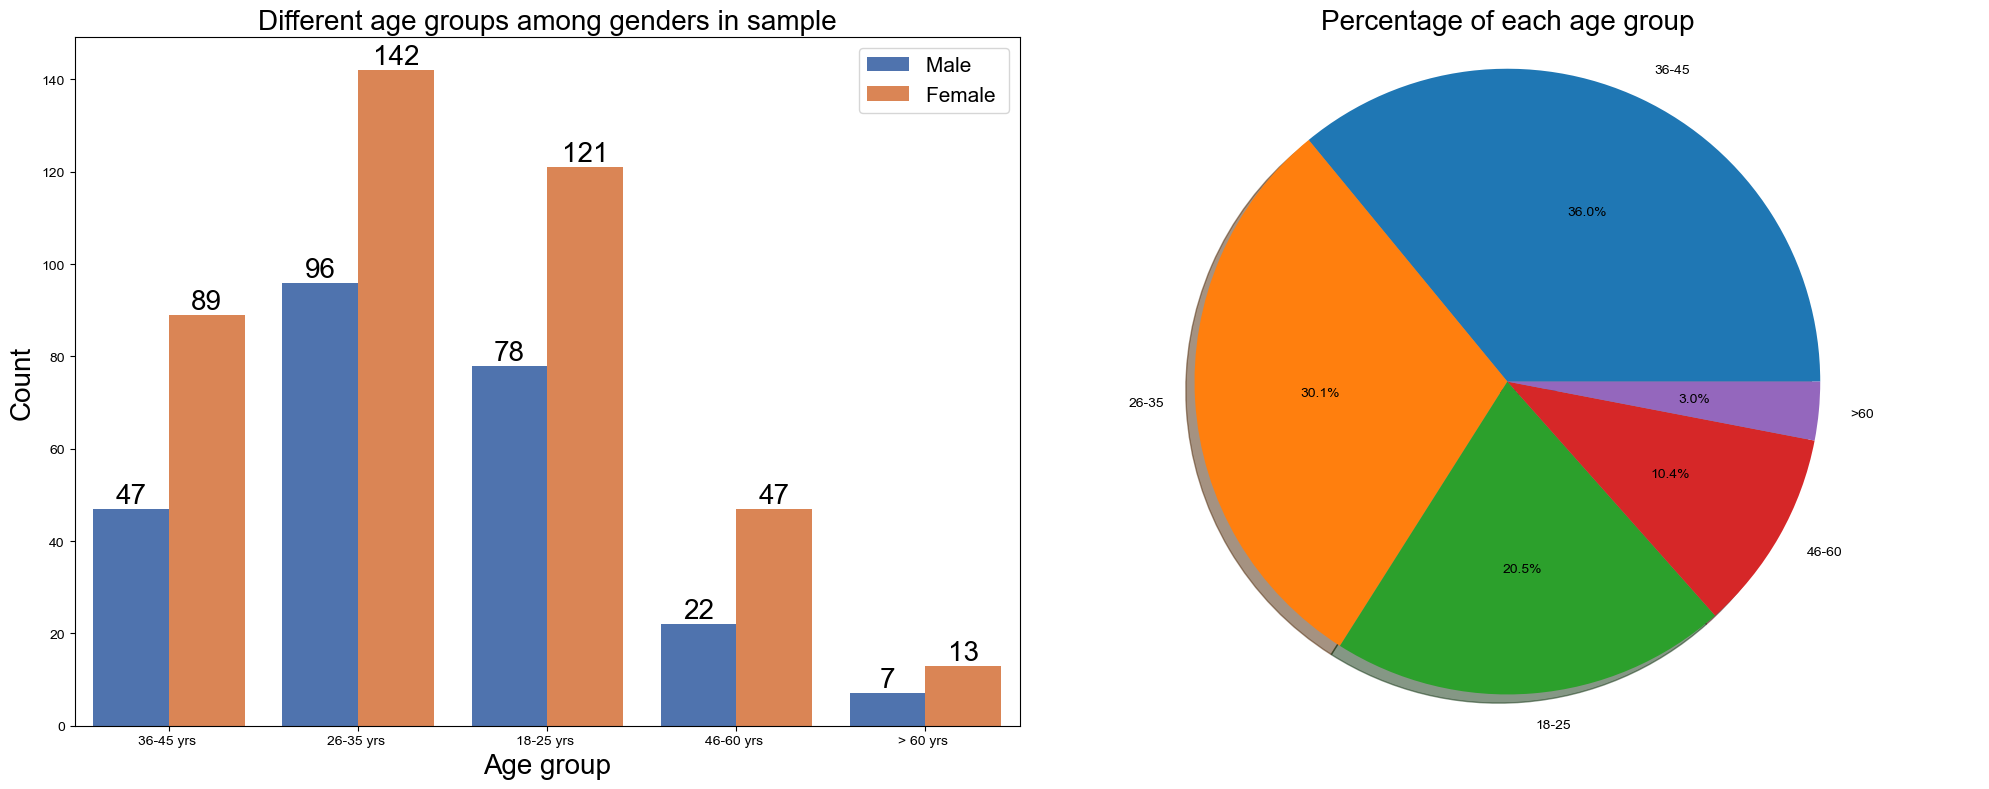

In [ ]:
plt.rcParams['font.family'] = 'Arial'
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['18'],data=df,palette = 'deep',hue='17',saturation=0.95,ax=ax[0])
ax[0].set_title('Different age groups among genders in sample',color='black',size=20)
ax[0].xaxis.set_label_text('Age group',size=20)
ax[0].yaxis.set_label_text('Count',size=20)
ax[0].tick_params(axis='x', rotation=0)
ax[0].legend(loc='upper right',ncol=1,fontsize=15)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.subplot(1, 2, 2)


plt.pie(x=df['18'].value_counts(), labels=['36-45', '26-35', '18-25', '46-60', '>60'], autopct='%1.1f%%', shadow=True)
plt.title('Percentage of each age group', size=20)
plt.axis('equal') 
plt.tight_layout()
plt.show()

In [ ]:
display(HTML(f"<h2>Count of origin and destination types reported by respondents</h2>"))

In [ ]:
place_dict={ 'Social/Religious place ':'Social', 'Friend/Relative’s place ':'Friend place',
       'Work/Business place ':'Work', 'School/College ':'College', 'Shopping place ':'Shopping'
       }
df['6']=df['6'].map(place_dict).fillna(df['6'])
df['4']=df['4'].map(place_dict).fillna(df['4'])

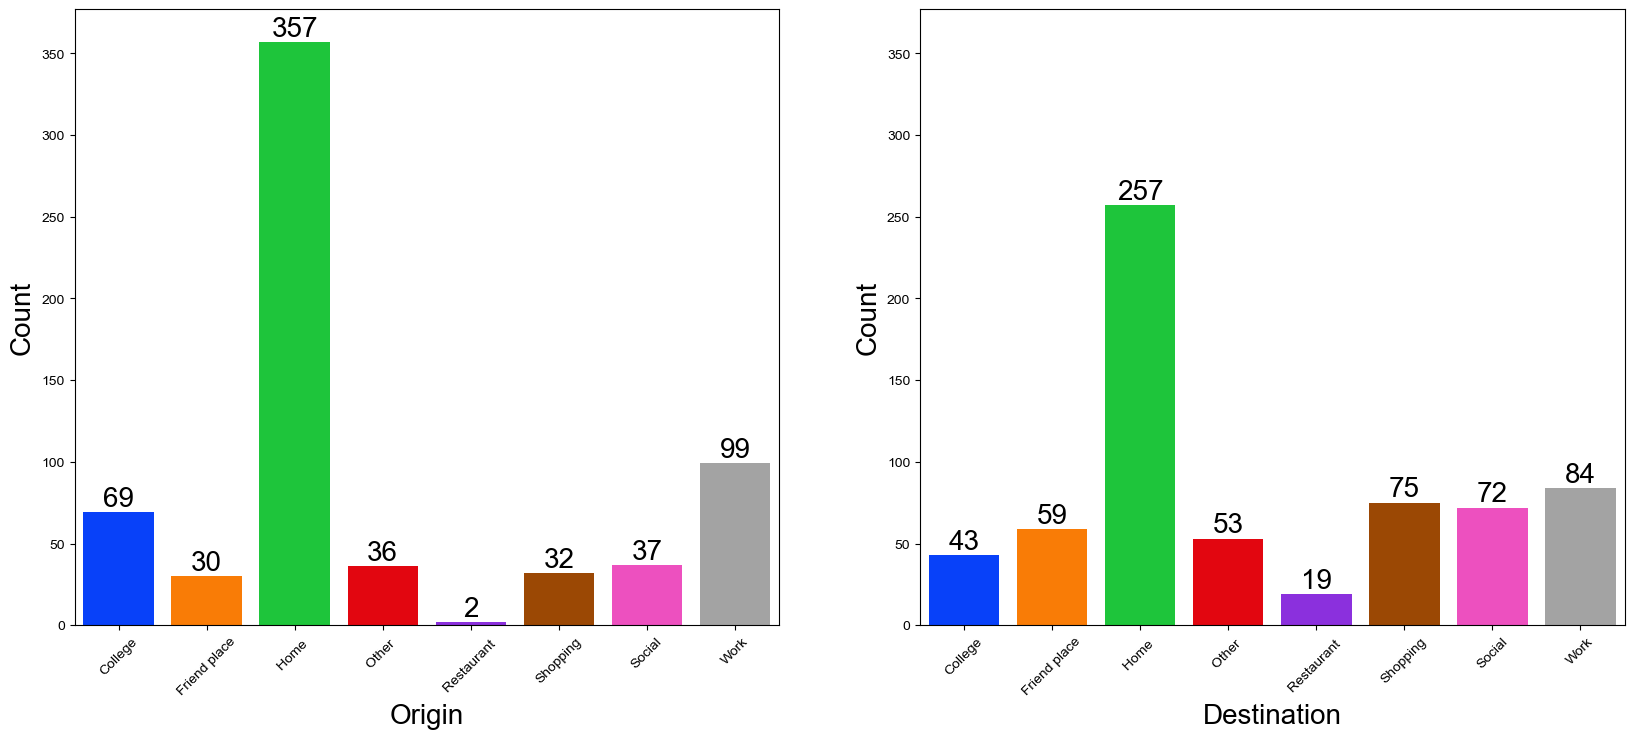

In [ ]:
df_sorted_origin = df.sort_values(by='6')
df_sorted_destination = df.sort_values(by='4')

# Get the maximum count among all categories
max_count = max(df_sorted_origin['6'].value_counts().max(), df_sorted_destination['4'].value_counts().max())+20

# Set font family
plt.rcParams['font.family'] = 'Arial'

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 8), sharey=False)  # Share y-axis

# Define color palette
color_palette = sns.color_palette('bright')

# Count plot for origin types
sns.countplot(x=df_sorted_origin['6'], data=df_sorted_origin, palette=color_palette, saturation=0.95, ax=ax[0])
ax[0].xaxis.set_label_text('Origin', size=20)
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_ylim(0, max_count)  # Set y-axis limit
ax[0].yaxis.set_label_text('Count', size=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Count plot for destination
sns.countplot(x=df_sorted_destination['4'], data=df_sorted_destination, palette=color_palette, saturation=0.95, ax=ax[1])
ax[1].xaxis.set_label_text('Destination', size=20)
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_ylim(0, max_count)  # Set y-axis limit
ax[1].yaxis.set_label_text('Count', size=20)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=20)

plt.show()

In [ ]:
# df['23'].unique()

In [ ]:
display(HTML(f"<h2>Mapping of different origins to destinations</h2>"))
display(HTML(f"<h0>x-axis represents the origin type and legend represents the destination type </h0>"))

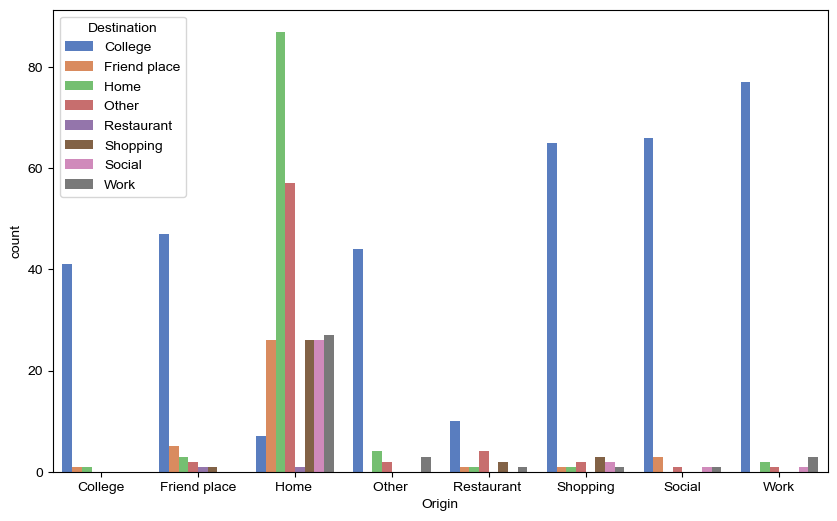

In [ ]:
df_sorted = df.sort_values(by=['4', '6'])

# Sort unique categories of column 6 alphabetically
sorted_categories = sorted(df_sorted['6'].unique())

# Set font family
plt.rcParams['font.family'] = 'Arial'

# Create count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='4', hue='6', data=df_sorted, palette='muted')
plt.xlabel('Origin')
plt.xticks(rotation=0)
plt.legend(title='Destination', labels=sorted_categories)
plt.show()

In [ ]:
display(HTML(f"<h2> Counts of access and egress modes reported in the sample</h2>"))

In [ ]:
mode_dict={'Drove and parked a two-Wheeler ':'Drove two-wheeler',
       'Dropped-off by friends/family members/others using two-wheeler ':'two-wheeler drop',
       'Drove and parked a car ':'Drove car', 'Auto Rickshaw ':'Auto', 'Ola/Uber car ':'Ola car',
       'Dropped-off by friends/family members/others using car ':'Car drop-off ',
       'Rapido/Uber moto/Ola App two-wheeler ':'Rapido','Any public transport ':'Bus',
       'Walk ':'Walk'}
df['10']=df['10'].map(mode_dict).fillna(df['10'])
df['11']=df['11'].map(mode_dict).fillna(df['11'])
# df['11'].unique()

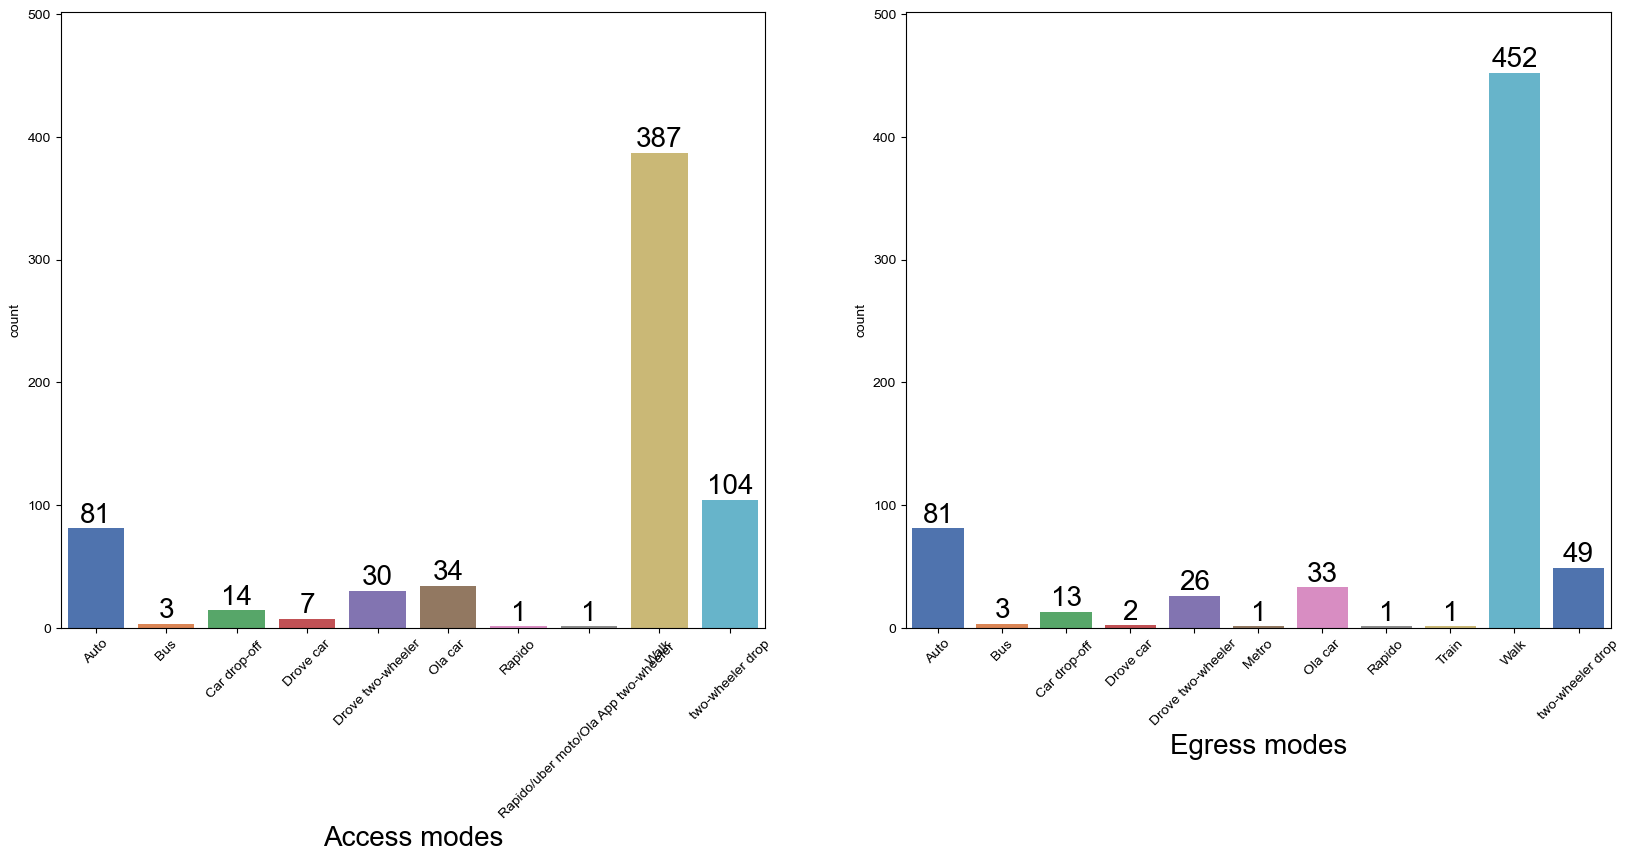

In [ ]:
df_sorted_origin = df.sort_values(by='10')
df_sorted_destination = df.sort_values(by='11')

# Get the maximum count among all categories
max_count = max(df_sorted_origin['10'].value_counts().max(), df_sorted_destination['11'].value_counts().max()) + 50

# Set font family
plt.rcParams['font.family'] = 'Arial'

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 8), sharey=False)  # Share y-axis

# Count plot for origin types
sns.countplot(x=df_sorted_origin['10'], data=df_sorted_origin, palette='deep', saturation=0.95, ax=ax[0])
ax[0].xaxis.set_label_text('Access modes', size=20)
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_ylim(0, max_count)  # Set y-axis limit
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Count plot for destination
sns.countplot(x=df_sorted_destination['11'], data=df_sorted_destination, palette='deep', saturation=0.95, ax=ax[1])
ax[1].xaxis.set_label_text('Egress modes', size=20)
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_ylim(0, max_count)  # Set y-axis limit
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=20)

# Set common y-axis label
# f.text(0.04, 0.5, 'Count', va='center', rotation='vertical', size=20)

plt.show()

In [ ]:
# # Create subplots with 1 row and 2 columns
# fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# # Value counts and word cloud for first column '2c'
# value_counts_2c = df['2c'].value_counts()
# wordcloud_2c = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(value_counts_2c)
# axs[0].imshow(wordcloud_2c, interpolation='bilinear')
# axs[0].axis('off')


# # Value counts and word cloud for second column '2d'
# value_counts_2d = df['2d'].value_counts()
# wordcloud_2d = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(value_counts_2d)
# axs[1].imshow(wordcloud_2d, interpolation='bilinear')
# axs[1].axis('off')


# # Display the subplots
# plt.show()


In [ ]:
display(HTML(f"<h2>Sample counts at different stations</h2>"))

In [ ]:
station_dict={'Nadaprabhu Kempegowda Station, Majestic ':'Majestic','Dr. B. R. Ambedkar Station, Vidhana Soudha ':'Vidhana Soudha',
              'Mantri Square Sampige Road ':'Mantri Square','Sir.M.Visvesvaraya Stn., Central College ':'Central College',
              'Benniganahalli - Tin factory ':'Benniganahalli','Whitefield - Kadugodi ':'Whitefield','Kengeri Bus Terminal ':'Kengeri BT',
              'Krishnarajapuram - K.R.Puram ':'KR Puram','Rashtreeya Vidyalaya Road ':'RV Road','Hopefarm Channasandra ':'Hopefarm',
              'Krantivira Sangolli Rayanna Railway Station ':'Krantivira','Mahakavi Kuvempu Road ':'Mahakavi Kuvempu',
              'Krishna Rajendra Market ':'KR Market','Sri Sathya Sai Hospital ':'Sathya Sai','Swami Vivekananda Road ':'Vivekananda Road',
              'Pantharapalya - Nayandahalli ':'Pantharapalya','Sri Balagangadharanatha Swamiji Station, Hosahalli ':'Hosahalli'
              ,'Rajarajeshwari Nagar ':'RR Nagar'}
df['2c']=df['2c'].map(station_dict).fillna(df['2c'])
df['2d']=df['2d'].map(station_dict).fillna(df['2d'])

In [ ]:
# Get value counts for column '2c'
value_counts_2c = df['2c'].value_counts()

# Get value counts for column '2d'
value_counts_2d = df['2d'].value_counts()

# Combine the value counts for both columns
combined_value_counts = value_counts_2c.add(value_counts_2d, fill_value=0)

combined_value_counts = combined_value_counts.astype(int)

# Sort the combined value counts in descending order
combined_value_counts_sorted = combined_value_counts.sort_values(ascending=False)

# Calculate the midpoint for splitting the data
midpoint = len(combined_value_counts_sorted) // 3

# Print the table with three pairs of stations and sample counts in a row
print("Station              Sample count      | Station              Sample count      | Station              Sample count")
print("---------------------------------------+----------------------------------------+-----------------------------------")
for i in range(min(midpoint, len(combined_value_counts_sorted))):
    station_1, count_1 = combined_value_counts_sorted.index[i], combined_value_counts_sorted.iloc[i]
    station_2, count_2 = combined_value_counts_sorted.index[midpoint + i], combined_value_counts_sorted.iloc[midpoint + i]
    station_3, count_3 = combined_value_counts_sorted.index[midpoint * 2 + i], combined_value_counts_sorted.iloc[midpoint * 2 + i]
    print(f"{station_1:<20}   {count_1:<15} | {station_2:<20}   {count_2:<15} | {station_3:<20}       {count_3:<15}")


Station              Sample count      | Station              Sample count      | Station              Sample count
---------------------------------------+----------------------------------------+-----------------------------------
Majestic               94              | Yeshwanthpur           25              | Srirampura                 14             
Challaghatta           47              | Cubbon Park            24              | Krantivira                 13             
Attiguppe              41              | Deepanjali Nagar       22              | Central College            13             
Nagasandra             39              | Benniganahalli         22              | KR Market                  12             
Mahalakshmi            38              | Jayaprakash Nagar      21              | Vajarahalli                12             
Jayanagar              37              | Sandal Soap Factory    20              | Lalbagh                    10             
Vijayanagar      

In [ ]:
custom_order = ['< 0.5 km ', '0.5 to 1 km ', '1 km to 1.5 km ','1.5 km to 2 km ','2 km to 2.5 km ', 
                '2.5 km to 3 km ','3 km to 3.5 km ','3.5 km to 4 km ', '4 km to 4.5 km ', 
                '4.5 km to 5 km ','> 5 km ']

# Convert the custom order to a categorical data type
custom_dtype = pd.CategoricalDtype(categories=custom_order, ordered=True)

# Assuming df is your DataFrame containing columns 10b and 10c
df['10b'] = df['10b'].astype(custom_dtype)
df['11b'] = df['11b'].astype(custom_dtype)
display(HTML(f"<h2>Access and egress distance value counts</h2>"))

In [ ]:
# Find the maximum count value among both columns
max_count = max(max(value_counts_10b_sorted.values), max(value_counts_11b_sorted.values))+50

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# Count plot for origin types
sns.barplot(x=value_counts_10b_sorted.index, y=value_counts_10b_sorted.values, palette='colorblind', saturation=0.95, ax=ax[0])
ax[0].set_title('Value counts of access distances', color='black', size=20)
ax[0].xaxis.set_label_text('Distance', size=20)
ax[0].yaxis.set_label_text('Count', size=20)
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_ylim(0, max_count)  # Set y-axis limits
for i, v in enumerate(value_counts_10b_sorted.values):
    ax[0].text(i, v + 0.05, str(v), ha='center', va='bottom', color='black', size=12)

# Count plot for destination
sns.barplot(x=value_counts_11b_sorted.index, y=value_counts_11b_sorted.values, palette='deep', saturation=0.95, ax=ax[1])
ax[1].xaxis.set_label_text('Distance', size=20)
ax[1].yaxis.set_label_text('Count', size=20)
ax[1].set_title('Value counts of egress distances', color='black', size=20)
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_ylim(0, max_count)  # Set y-axis limits
for i, v in enumerate(value_counts_11b_sorted.values):
    ax[1].text(i, v + 0.05, str(v), ha='center', va='bottom', color='black', size=12)

plt.show()


NameError: name 'value_counts_10b_sorted' is not defined

In [ ]:
display(HTML(f"<h2>Perception of traffic on bicycling between home to metro/bus station</h2>"))

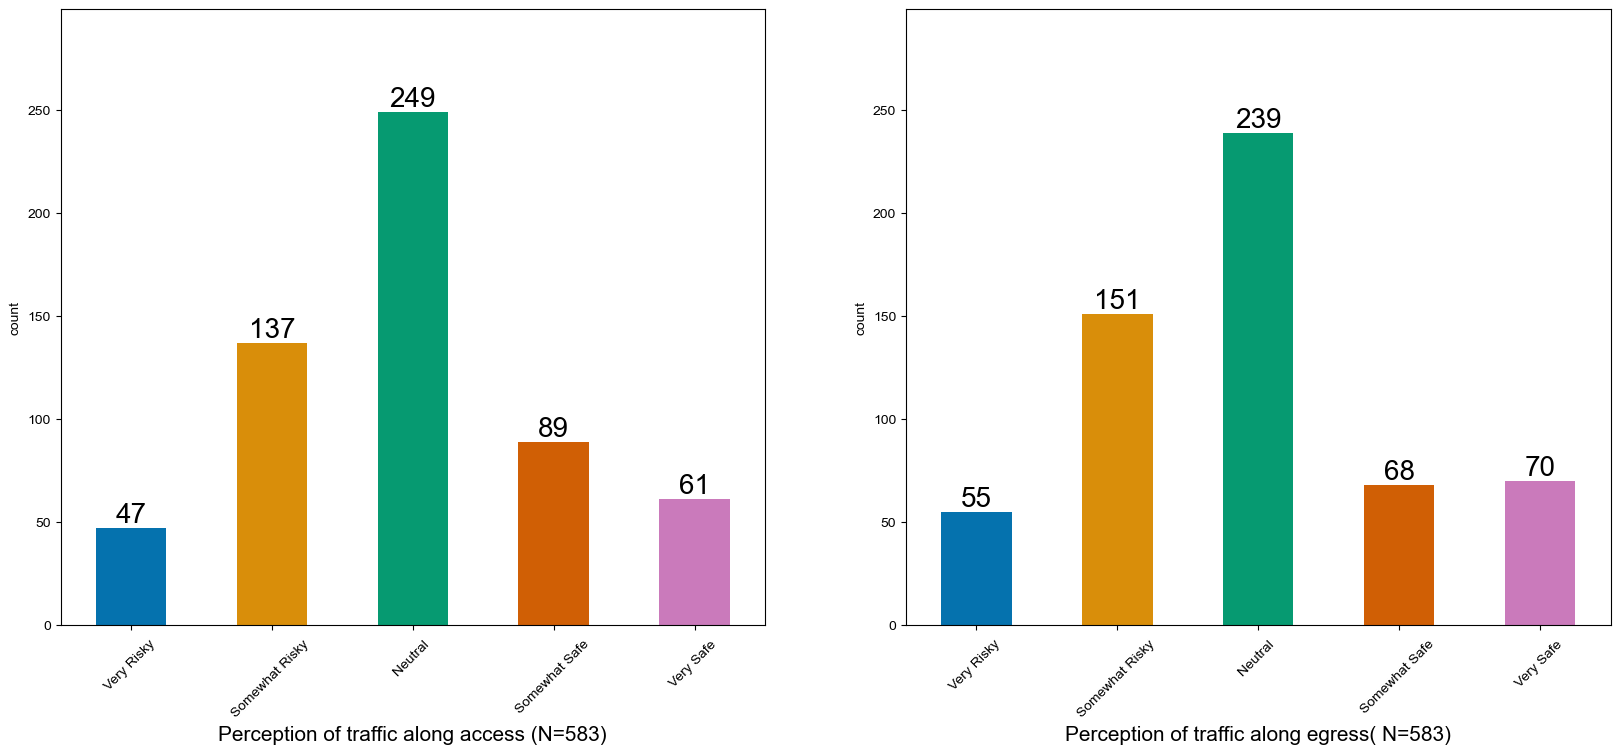

In [ ]:
order_list = ['Very Risky ', 'Somewhat Risky ', 'Neutral ', 'Somewhat Safe ', 'Very Safe ']
color_palette = sns.color_palette('colorblind', n_colors=len(order_list))

# Get the maximum count among all categories in both columns
max_count = max(df['12a'].value_counts().max(), df['12b'].value_counts().max()) + 50

# Set font family
plt.rcParams['font.family'] = 'Arial'

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# Count plot for origin types
sns.countplot(x='12a', data=df, order=order_list, palette=color_palette, saturation=0.95, ax=ax[0], width=0.5)
ax[0].xaxis.set_label_text('Perception of traffic along access (N={})'.format(df.shape[0]), size=15)
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_ylim(0, max_count)  # Set y-axis limit
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Count plot for destination
sns.countplot(x='12b', data=df, order=order_list, palette=color_palette, saturation=0.95, ax=ax[1], width=0.5)
ax[1].xaxis.set_label_text('Perception of traffic along egress( N={})'.format(df.shape[0]), size=15)
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_ylim(0, max_count)  # Set y-axis limit
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=20)

plt.show()
# plt.tight_layout()

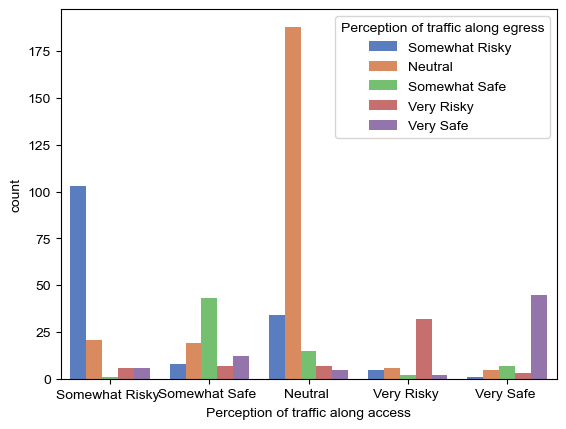

In [ ]:
display(HTML(f"<h0>x-axis represents perception of traffic along access and legend represents perception of traffic along egress</h0>"))
sns.countplot(x='12a', hue='12b', data=df, palette='muted')
# plt.title('Clustered Bar Chart of Two Categorical Columns')
plt.xlabel('Perception of traffic along access')
plt.legend(title='Perception of traffic along egress')
plt.show()

In [ ]:
# display(HTML(f"<h2>Variation of response to using PBS system wrt access distance when no special facility is provided</h2>"))

In [ ]:
# order = ['Will use for access trip ', 'Will use for egress trip ', 'Will use for both trips', 'Will not use for both trips ']

# # Set font family
# plt.rcParams['font.family'] = 'Arial'

# # Create subplots
# f, ax = plt.subplots(1, 2, figsize=(20, 8))

# # Bar plot
# sns.countplot(x='12c(a)', data=df, hue='10b', order=order, palette='bright', saturation=0.95, ax=ax[0])
# ax[0].xaxis.set_label_text('No cycling facility', size=20)
# for container in ax[0].containers:
#     ax[0].bar_label(container, color='black', size=10)

# # Pie chart
# plt.subplot(1, 2, 2)
# plt.pie(x=df['12c(a)'].value_counts(), labels=order, autopct='%1.1f%%', shadow=True,
#         colors=['#007bff', '#ffc107', '#28a745', '#dc3545'])
# plt.axis('equal')
# plt.tight_layout()

# plt.show()
# # plt.tight_layout()

In [ ]:
display(HTML(f"<h2>Response to various bicycle facilities summarized</h2>"))
display(HTML(f"<h0>Considering all data points, other two facilities are not included as there may be influence of presence of signal as additional time spent and modified options were made for further survey</h0>"))

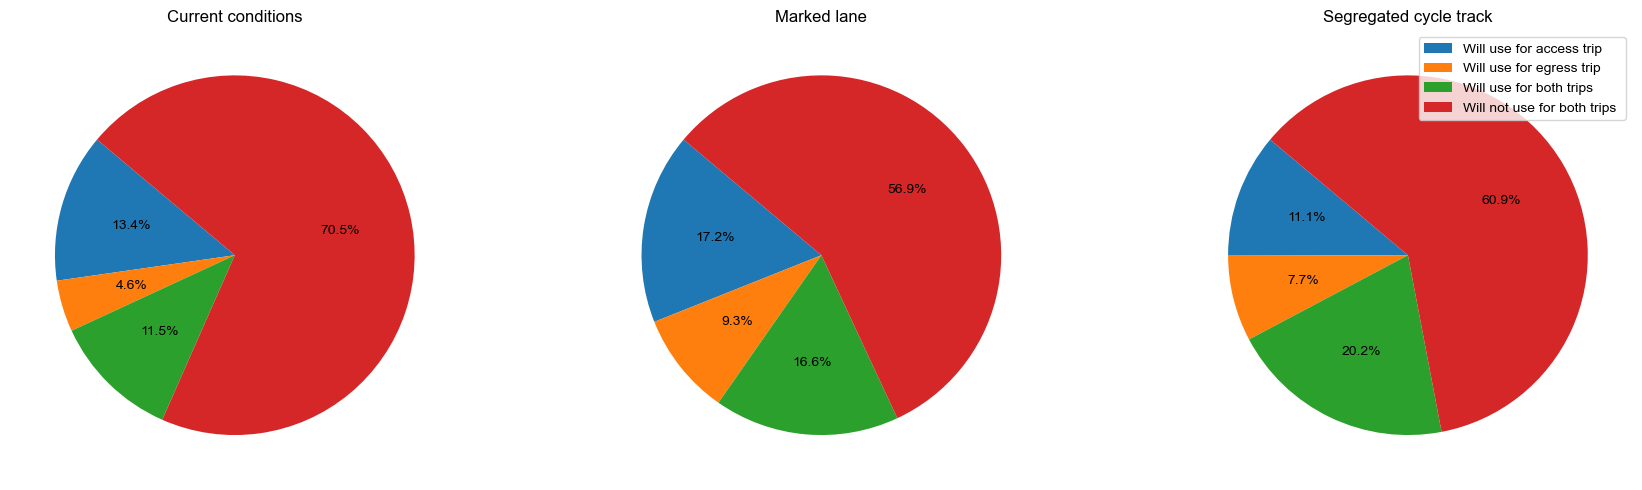

In [ ]:
# Define the column names
columns = [ '12c(a)','12c(b)', '12c(d)']

# Define individual titles for each plot
titles = ['Current conditions','Marked lane','Segregated cycle track']

# Define the order of legend and values
list_order = ['Will use for access trip ', 'Will use for egress trip ', 'Will use for both trips', 'Will not use for both trips ']

# Calculate the number of rows required
num_rows = 1

# Create a figure and axes for the subplots
fig, axs = plt.subplots(num_rows, 3, figsize=(18, 5*num_rows))

# Flatten the axes array if there's only one row
if num_rows == 1:
    axs = axs.reshape(1, -1)

# Iterate over each column and plot a pie chart
for i, column in enumerate(columns):
    row_index = i // 3
    col_index = i % 3
    
    # Calculate value counts for the column
    counts = df[column].value_counts()[list_order]
    
    # Plot the pie chart without labels
    axs[row_index, col_index].pie(counts, labels=None, autopct='%1.1f%%', startangle=140)
    
    # Set individual titles for each chart
    axs[row_index, col_index].set_title(titles[i])

# Add legend to the top-right corner
plt.legend(list_order, loc='upper right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
display(HTML(f"<h2>Responses for question 23 (Willingness to use bicycle when parking is provided), when marked lane and segregated track are available</h2>"))

In [ ]:
parking_dict={'No, I will not use a bicycle. ':'Will not use',
       'Current travelling conditions with no special cycling facility. Per Trip cost 0₹. Parking cost of 10₹ per day. ':'Current conditions',
       'If a marked cycle lane is provided. Per Trip cost 1₹. Parking cost 10₹ per day. ':'Marked lane',
       'Not Applicable- because neither of my trip end is home. ':'Not Applicable',
       'If a marked cycle lane provided along with bicycle traffic signals is provided. Per Trip cost 2₹. Parking cost 10₹ per day. ':'Marked lane + signal',
       'If a segregated cycle track is provided. Per Trip cost 3₹.. Parking cost 10₹ per day. ':'Segregated track',
       'If a segregated cycle track with bicycle signal is provided. Per Trip cost 4₹. Parking cost 10₹ per day. ':'Segregated track + signal',
       'If a segregated cycle track provided along with bicycle traffic signals. At traffic signals, there is a separate signal phase for bicycle movement.Additional cost Per Trip 4₹ . .                                                                                                                                                                     .':
       'Segregated track + signal',
       'If a segregated cycle track is provided. At traffic signals, no separate signal phase for bicycle movement.Additional cost Per Trip 3₹ .':'Segregated track',
       'If a marked cycle lane is provided along with bicycle traffic signals. At traffic signals, there is a separate signal phase for bicycle movement.Additional cost Per Trip 2₹.  ':'Marked lane + signal',
       'If a marked cycle lane is provided. At traffic signals, no separate signal phase for bicycle movement.Additional cost Per Trip 1₹. ':'Marked lane',
       'Current travelling conditions with no special cycling facility.Additional cost Per Trip 0₹. ಯಾವುದೇ ವಿಶೇಷ ಸೈಕ್ಲಿಂಗ್ ಸೌಲಭ್ಯವಿಲ್ಲದೆ ಪ್ರಸ್ತುತ ಪ್ರಯಾಣದ ಪರಿಸ್ಥಿತಿಗಳು. ಪ್ರತಿ ಪ್ರವಾಸಕ್ಕೆ ಹೆಚ್ಚುವರಿ ವೆಚ್ಚ 0₹':'Current conditions',}

df['23']=df['23'].map(parking_dict).fillna(df['23'])

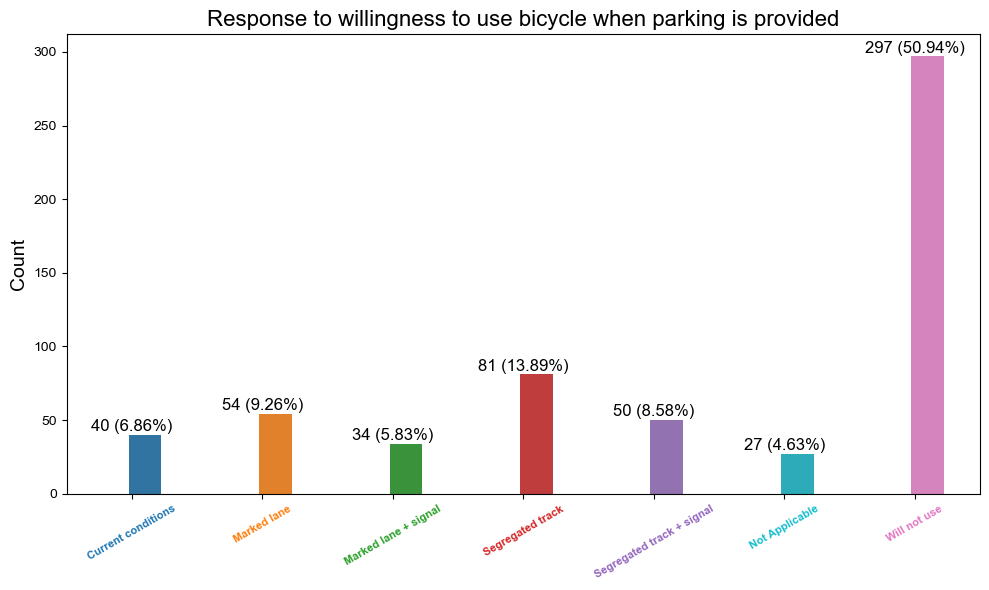

In [ ]:
# Define the ordered list of categories
ordered_list = ['Current conditions', 'Marked lane', 'Marked lane + signal', 
                'Segregated track','Segregated track + signal', 'Not Applicable', 'Will not use']

# Reorder the categories in column 23 based on the ordered list
df.loc[:, '23'] = pd.Categorical(df['23'], categories=ordered_list, ordered=True)

# Count the number of entries for each category
counts = df['23'].value_counts()

# Sort the counts based on the ordered list
counts = counts.reindex(ordered_list)

# Calculate the total count
total_count = counts.sum()

# Define colors for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#17becf', '#e377c2']

# Plot the bar chart with adjusted bar width
bar_width = 0.25  # Adjust bar width here
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=counts.index, y=counts.values, palette=colors, dodge=False, errorbar=None)

# Adjust the width of the bars
for bar in ax.patches:
    bar.set_width(bar_width)
    bar.set_x(bar.get_x() + (1 - bar_width) / 2)  # Center the bars

# Add count values and percentages on top of each bar
for i, count in enumerate(counts):
    percentage = round((count / total_count) * 100, 2)
    ax.text(i, count + 0.5, f'{count} ({percentage}%)', ha='center', va='bottom', fontsize=12)

# Add category labels directly on the x-axis with matching colors
ax.set_xticklabels(counts.index, rotation=0, ha='center', fontsize=12, fontweight='bold', color='black')

# Color the x-axis labels to match the bar colors
for xtick, color in zip(ax.get_xticklabels(), colors):
    xtick.set_color(color)

plt.title('Response to willingness to use bicycle when parking is provided', fontsize=16)
plt.xlabel('', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=30, fontsize=8)

plt.tight_layout()
plt.show()


In [ ]:
display(HTML(f"<h2>Reasons for not willing to use own bicycle</h2>"))


# Apply the transformations
english_texts = df['24'].apply(lambda x: x.split(',')[0].split('(')[0].strip() if pd.notna(x) else None)

# Drop NaN values and count occurrences of each English text
english_texts_counts = english_texts.dropna().value_counts()

# Convert the value counts to a DataFrame for tabulate
counts_table = pd.DataFrame({'English Text': english_texts_counts.index, 'Count': english_texts_counts.values})

# Format the table
table_str = tabulate(counts_table, headers='keys', tablefmt='grid', showindex=False)

# Print the formatted table and total value count
display(HTML(f"<h0>Total resposes reported as will not use: {english_texts_counts.sum()}</h0>"))
print(table_str)

+---------------------------------------------------------------------+---------+
| English Text                                                        |   Count |
+=====================================================================+=========+
| Cannot ride a bicycle or health constraints.                        |     135 |
+---------------------------------------------------------------------+---------+
| Do not feel safe about traffic along my route.                      |      74 |
+---------------------------------------------------------------------+---------+
| Concerns about being tired and sweaty.                              |      39 |
+---------------------------------------------------------------------+---------+
| Need to carry things or travelling with someone.                    |      32 |
+---------------------------------------------------------------------+---------+
| Concern about pollution along my route.                             |       3 |
+---------------

In [ ]:
df_modified= df[df['Timestamp'] > '2024-05-16 00:00:00']
display(HTML(f"<h2>Number of samples after modifying the options related to signal: {df_modified.shape[0]}</h2>"))

In [ ]:
display(HTML(f"<h2>Variation of response to using PBS system wrt access distance when no special facility is provided</h2>"))

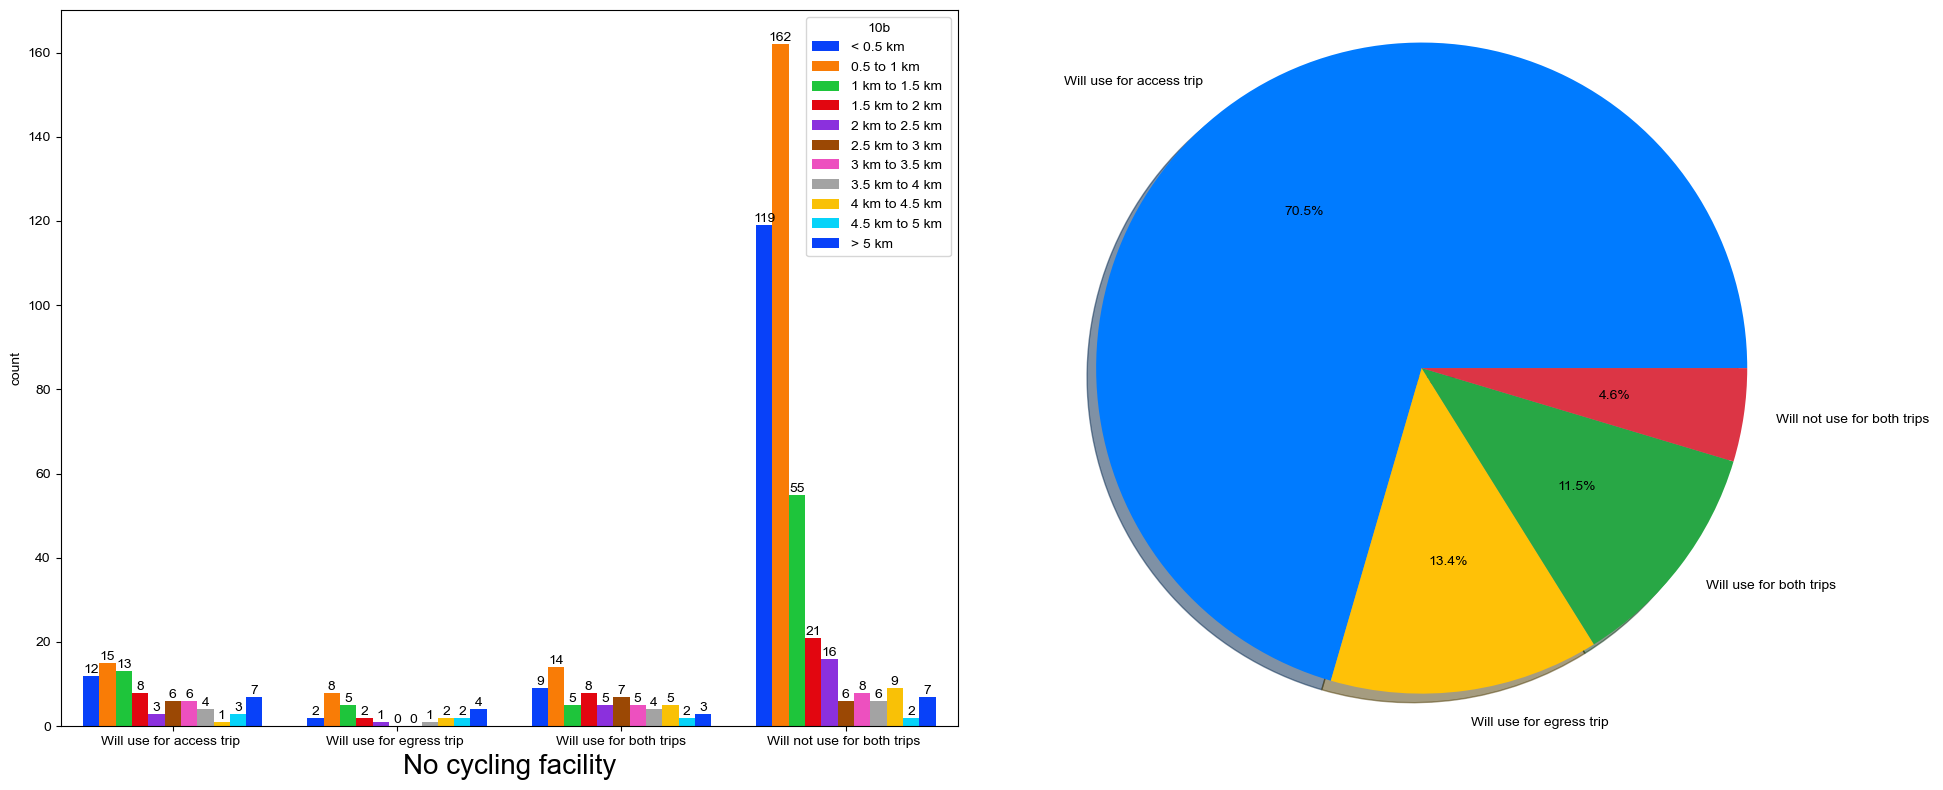

In [ ]:
order = ['Will use for access trip ', 'Will use for egress trip ', 'Will use for both trips', 'Will not use for both trips ']

# Set font family
plt.rcParams['font.family'] = 'Arial'

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# Bar plot
sns.countplot(x='12c(a)', data=df, hue='10b', order=order, palette='bright', saturation=0.95, ax=ax[0])
ax[0].xaxis.set_label_text('No cycling facility', size=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=10)

# Pie chart
plt.subplot(1, 2, 2)
plt.pie(x=df['12c(a)'].value_counts(), labels=order, autopct='%1.1f%%', shadow=True,
        colors=['#007bff', '#ffc107', '#28a745', '#dc3545'])
plt.axis('equal')
plt.tight_layout()

plt.show()
# plt.tight_layout()

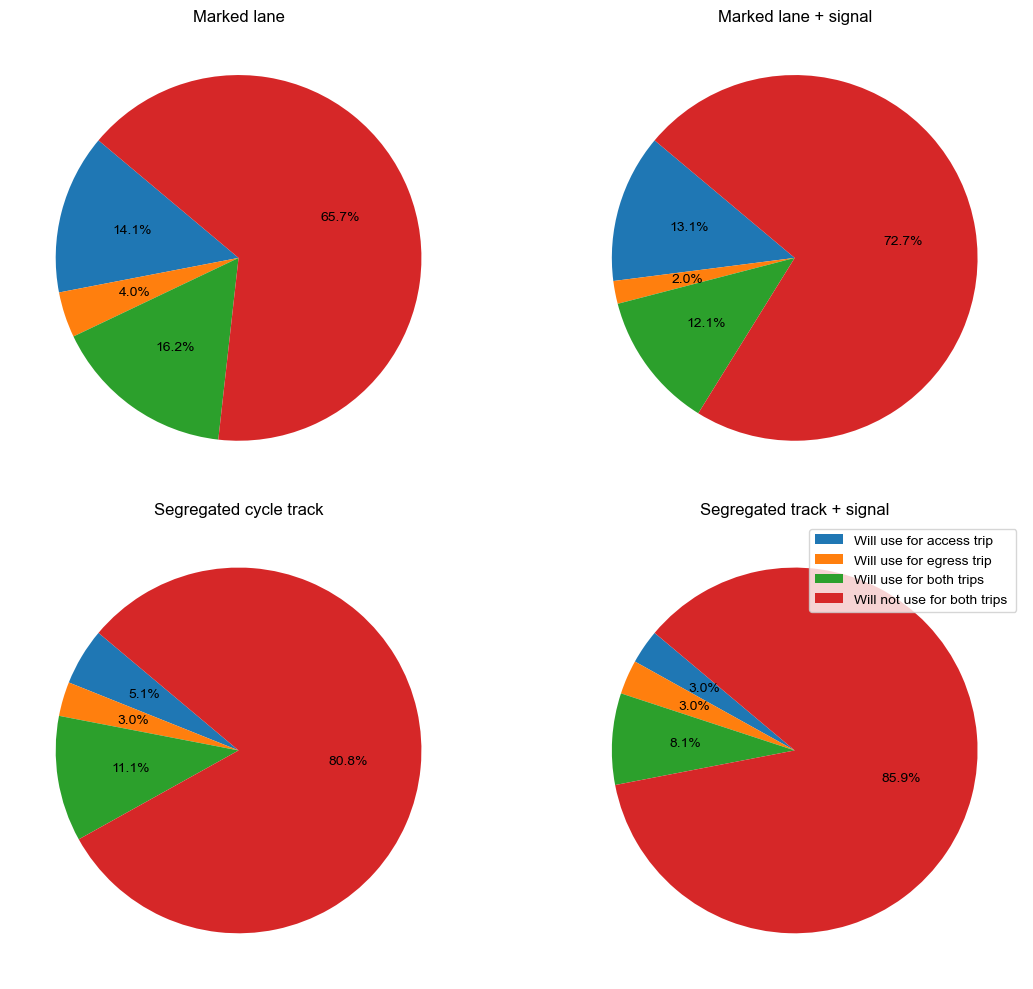

In [ ]:
# Define the column names
columns = ['12c(b)', '12c(c)', '12c(d)', '12c(e)']

# Define individual titles for each plot
titles = ['Marked lane', 'Marked lane + signal', 'Segregated cycle track', 'Segregated track + signal']

# Define the order of legend and values
list_order = ['Will use for access trip ', 'Will use for egress trip ', 'Will use for both trips', 'Will not use for both trips ']

# Calculate the number of rows required
num_rows = (len(columns) + 1) // 2

# Create a figure and axes for the subplots
fig, axs = plt.subplots(num_rows, 2, figsize=(12, 5*num_rows))

# Flatten the axes array if there's only one row
if num_rows == 1:
    axs = axs.reshape(1, -1)

# Iterate over each column and plot a pie chart
for i, column in enumerate(columns):
    row_index = i // 2
    col_index = i % 2
    
    # Calculate value counts for the column
    counts = df_modified[column].value_counts()[list_order]
    
    # Plot the pie chart without labels
    axs[row_index, col_index].pie(counts, labels=None, autopct='%1.1f%%', startangle=140)
    
    # Set individual titles for each chart
    axs[row_index, col_index].set_title(titles[i])

# Add legend to the top-right corner
plt.legend(list_order, loc='upper right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
# plt.tight_layout()

In [ ]:
display(HTML(f"<h2>Responses to use of own bicycle when parking facility is provided at metro stations</h2>"))

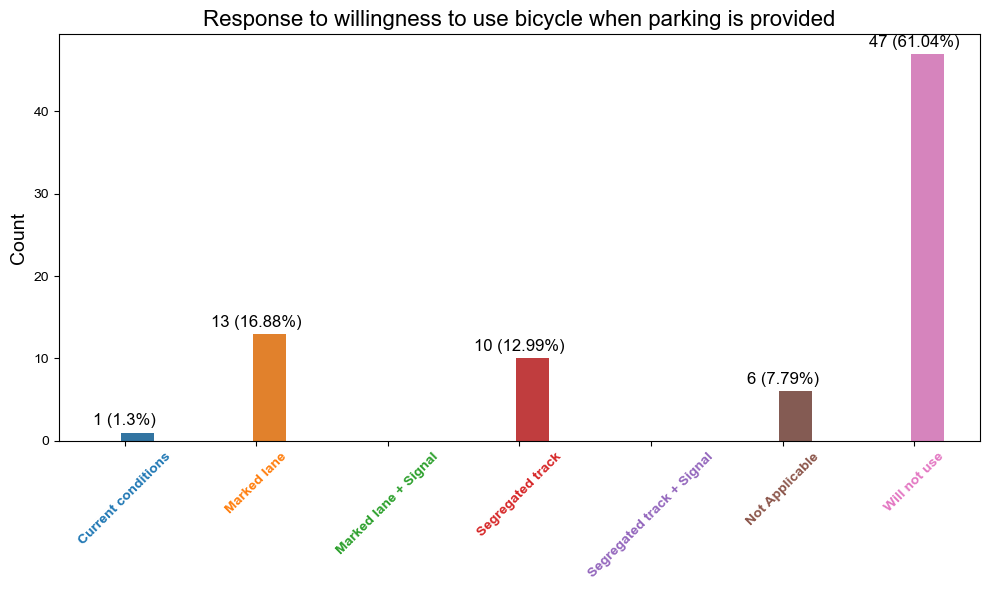

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the updated ordered list of categories
ordered_list = ['Current conditions', 'Marked lane', 'Marked lane + Signal',
                'Segregated track', 'Segregated track + Signal', 'Not Applicable', 'Will not use']

# Ensure '23' is treated as a categorical column with the given ordered categories
df_modified['23'] = pd.Categorical(df_modified['23'], categories=ordered_list, ordered=True)

# Drop NaN values in column '23' to avoid plotting issues
df_modified = df_modified.dropna(subset=['23'])

# Count the number of entries for each category
counts = df_modified['23'].value_counts()

# Sort the counts based on the ordered list
counts = counts.reindex(ordered_list)

# Calculate the total count
total_count = counts.sum()


# Ensure counts are finite values
if not counts.isna().any():
    # Define colors for the bars
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

    # Plot the bar chart with adjusted bar width
    bar_width = 0.25  # Adjust bar width here
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=counts.index, y=counts.values, palette=colors, dodge=False, errorbar=None)

    # Adjust the width of the bars
    for bar in ax.patches:
        bar.set_width(bar_width)
        bar.set_x(bar.get_x() + (1 - bar_width) / 2)  # Center the bars

    # Add count values and percentages on top of each bar
    for i, count in enumerate(counts):
        if count > 0:  # Only annotate bars with counts greater than zero
            percentage = round((count / total_count) * 100, 2)
            ax.text(i, count + 0.5, f'{count} ({percentage}%)', ha='center', va='bottom', fontsize=12)

    # Add category labels directly on the x-axis with matching colors
    ax.set_xticklabels(counts.index, rotation=0, ha='center', fontsize=12, fontweight='bold', color='black')

    # Color the x-axis labels to match the bar colors
    for xtick, color in zip(ax.get_xticklabels(), colors):
        xtick.set_color(color)
        xtick.set_rotation(45)
        xtick.set_fontsize(10)

    plt.title('Response to willingness to use bicycle when parking is provided', fontsize=16)
    plt.xlabel('', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.tight_layout()
    plt.show()
else:
    print("There are NaNs in the counts.")


In [ ]:
display(HTML(f"<h2>Reasons for not willing to use own bicycle</h2>"))


# Apply the transformations
english_texts = df_modified['24'].apply(lambda x: x.split(',')[0].split('(')[0].strip() if pd.notna(x) else None)

# Drop NaN values and count occurrences of each English text
english_texts_counts = english_texts.dropna().value_counts()

# Convert the value counts to a DataFrame for tabulate
counts_table = pd.DataFrame({'English Text': english_texts_counts.index, 'Count': english_texts_counts.values})

# Format the table
table_str = tabulate(counts_table, headers='keys', tablefmt='grid', showindex=False)

# Print the formatted table and total value count
display(HTML(f"<h0>Total resposes reported as will not use: {english_texts_counts.sum()}</h0>"))
print(table_str)

+--------------------------------------------------+---------+
| English Text                                     |   Count |
+==================================================+=========+
| Cannot ride a bicycle or health constraints.     |      27 |
+--------------------------------------------------+---------+
| Do not feel safe about traffic along my route.   |      10 |
+--------------------------------------------------+---------+
| Need to carry things or travelling with someone. |       5 |
+--------------------------------------------------+---------+
| Concerns about being tired and sweaty.           |       4 |
+--------------------------------------------------+---------+
| Walkable distance from home                      |       1 |
+--------------------------------------------------+---------+


In [ ]:
# plt.rcParams['font.family'] = 'Arial'
# f, ax = plt.subplots(1, 2, figsize=(20, 8))

# sns.countplot(x=df['12c(c)'], data=df, hue='10b', palette='bright', saturation=0.95, ax=ax[0])
# ax[0].xaxis.set_label_text('Marked lane + signal', size=20)
# for container in ax[0].containers:
#     ax[0].bar_label(container, color='black', size=10)

# plt.subplot(1, 2, 2)
# plt.pie(x=df['12c(c)'].value_counts(), labels=['Will not use for both trips ', 'Will use for access trip ',
#                                                'Will use for both trips', 'Will use for egress trip '],
#         autopct='%1.1f%%', shadow=True,
#         colors=['#007bff', '#ffc107', '#28a745', '#dc3545', '#6f42c1'])

# # Adjust aspect ratio to maintain circular shape
# plt.gca().set_aspect('equal')

# plt.show()


In [ ]:
# plt.rcParams['font.family'] = 'Arial'
# f, ax = plt.subplots(1, 2, figsize=(20, 8))

# sns.countplot(x=df['12c(d)'], data=df, hue='10b', palette='bright', saturation=0.95, ax=ax[0])
# ax[0].xaxis.set_label_text('Segregated track', size=20)
# for container in ax[0].containers:
#     ax[0].bar_label(container, color='black', size=10)

# plt.subplot(1, 2, 2)
# plt.pie(x=df['12c(d)'].value_counts(), labels=['Will not use for both trips ', 'Will use for access trip ',
#                                                'Will use for both trips', 'Will use for egress trip '],
#         autopct='%1.1f%%', shadow=True,
#         colors=['#007bff', '#ffc107', '#28a745', '#dc3545', '#6f42c1'])

# # Adjust aspect ratio to maintain circular shape
# plt.gca().set_aspect('equal')

# plt.show()


In [ ]:
# plt.rcParams['font.family'] = 'Arial'
# f, ax = plt.subplots(1, 2, figsize=(20, 8))

# sns.countplot(x=df['12c(e)'], data=df, hue='10b', palette='bright', saturation=0.95, ax=ax[0])
# ax[0].xaxis.set_label_text('Segregated track + signal ', size=20)
# for container in ax[0].containers:
#     ax[0].bar_label(container, color='black', size=10)

# plt.subplot(1, 2, 2)
# plt.pie(x=df['12c(e)'].value_counts(), labels=['Will not use for both trips ', 'Will use for access trip ',
#                                                'Will use for both trips', 'Will use for egress trip '],
#         autopct='%1.1f%%', shadow=True,
#         colors=['#007bff', '#ffc107', '#28a745', '#dc3545', '#6f42c1'])

# # Adjust aspect ratio to maintain circular shape
# plt.gca().set_aspect('equal')

# plt.show()
